In [11]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [13]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

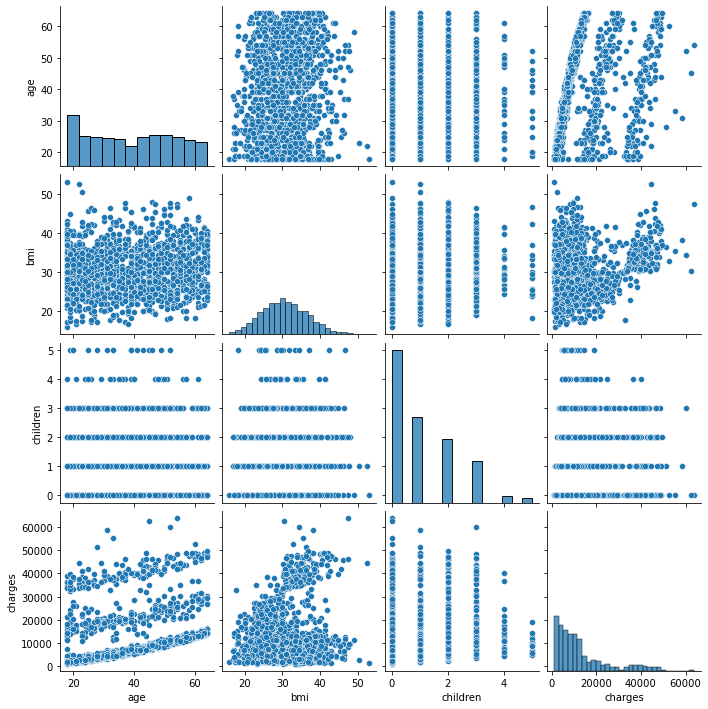

In [17]:
#Pair plot
import seaborn as sns
p = sns.pairplot(data)

# Assumptions for Linear Regression

# 1. Linearity

There should be linear relationship between indepenent variable and dependent variables. This can be checked using pairplot. 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


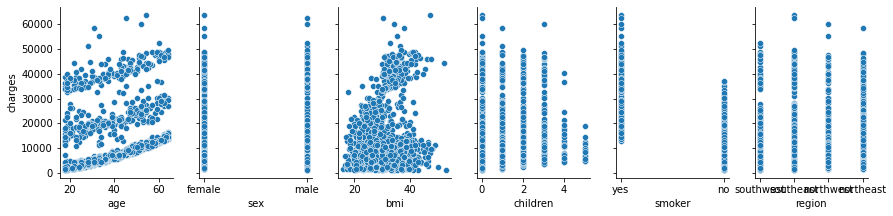

In [18]:
p = sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'], y_vars='charges', size=3, aspect=0.7)

Amoung the independent variable, interger variables are age and bmi. Age is linearly related to charges but BMI is not perfectly linear.

# 2. No multicollinearity

We need to ensure there is no collinearity between independent variables. If there exists and collinearity then run the model by removing one variable amoung the collinear variable. Thre is no need to include dependent variable.

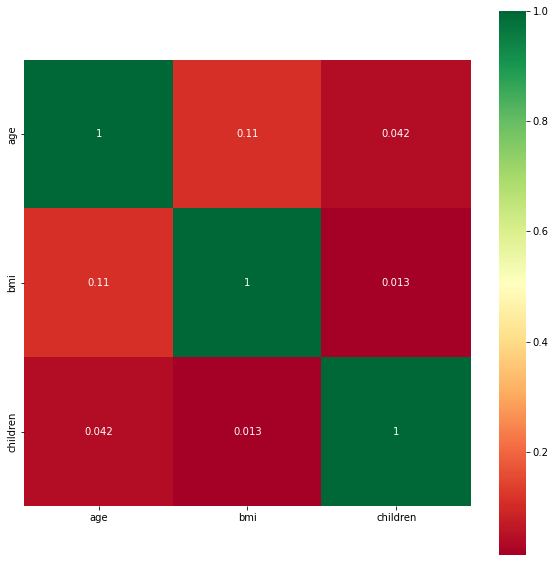

In [19]:
data1 = data.drop(['charges'], axis = 1)
plt.figure(figsize=(10,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data1.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

Any value that is greater than 0.8 is considered as collinear. In the above table all the values are less than 0.8 hence there is no collinearity.  

Rest of the assumpts depends on residuals hence we need to linear regression model.

# Checking covariance and correlation

In [46]:
data.cov()

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


There is a positive covariance meaning all the indepenent variable pairs vary in the same direction. 
Covariance just gives the directional relationship between two variables but not the magnitude.

In [43]:
data.corr(method ='pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Correlation gives both the direction and magnitude of how two variable vary. It ranges from -1 to 1. If the value is close to 1 then its strongly correlated in positively direction.
If its close to -1 its strongly correlated in negative direction. 

# Run linear regression model

In [21]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Convert column sex, children, smoker, region into categorical.

In [22]:
cat_col = ['sex','children','smoker','region']

In [23]:
data_en = pd.get_dummies(data = data, prefix= 'ohe', prefix_sep = '-', columns = cat_col, drop_first = True, dtype = 'int8')

In [24]:
data_en

,age,bmi,charges,ohe-male,ohe-1,ohe-2,ohe-3,ohe-4,ohe-5,ohe-yes,ohe-northwest,ohe-southeast,ohe-southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
x = data_en.drop(["charges"],axis=1)
y = data_en.charges

In [49]:
sc = StandardScaler()
X = sc.fit_transform(x)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [51]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [52]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.7359213559582952


In [53]:
Adj_r2 = 1 - (1-r2_score(y_train, y_pred)) * (len(y_train)-1)/(len(y_train)-X.shape[1]-1)
Adj_r2

0.7327204026971836

In [54]:
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.7359213559582952
0.7940111231716589


# 3. Mean of Residuals

Residuals are the differences between the true and the predicted values. We need to ensure mean of residuals are zero to check for linearity.

In [33]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(round( mean_residuals,2)))

Mean of Residuals -0.0


# 4. Check for Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. There shouldnt be any patterens observed by plotting the residuals against predicted values. 

Error terms should have constant variance.

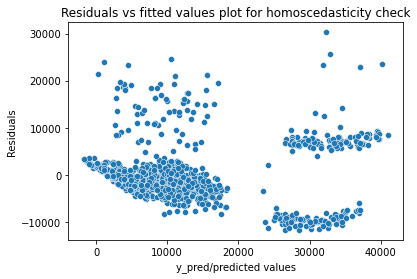

In [22]:
p = sns.scatterplot(x = y_pred, y = residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Above grapha does not provide clear insight about the constant variance. Hence let us apply hypothesis test to check whether there is constant variance in residuals.

Goldfeld Quandt Test is used to check heteroscedasticity.

- Null Hypothesis: Residuals are homoscedastic
- Alternative Hypothesis: Residuals are not homoscedastic(i.e heteroscedastic).

Let us choose 95% confidence and tests that the p-value are less than 0.05 to reject the null hypothesis.

In [23]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.237871631649356), ('p-value', 0.009204039815911825)]

Here p value is less than 0.05, hence reject null hypothesis that error terms are not homoscedastic. 
This is not ideal case for linear regression but let us still continue checking for other assumptions.

# 5. Check for Normality of error terms/residuals

Residuals should be normaly distributed.

<ipython-input-24-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


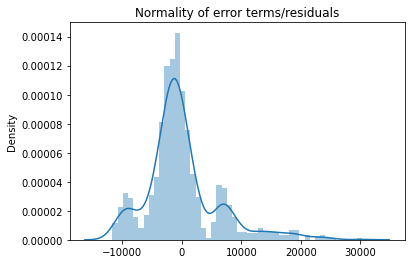

In [24]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are almost normally distributed except the two spikes. 

# 6. No autocorrelation of residuals

There shouldn't be any autocorrelation between residuals 

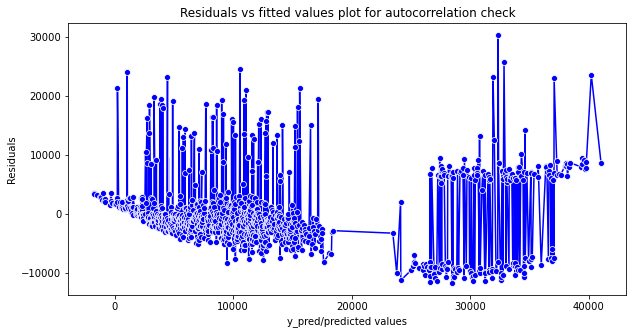

In [25]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x = y_pred,y = residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Above graph does not provide good insight hence lets us run hypothesis test.

Ljungbox test:
- Null Hypothesis: Autocorrelation is absent.
- Alternative Hypothesis: Autocorrelation is present.

In [37]:
from statsmodels.stats.diagnostic import acorr_ljungbox

min(acorr_ljungbox(residuals, lags= 15)['lb_pvalue'])

0.10128651668287895

Since p value is greater than 0.05 hence fail to reject the null hypothesis that error terms are not autocorrelated.

Autocorrelation can also be checked using acf and pacf

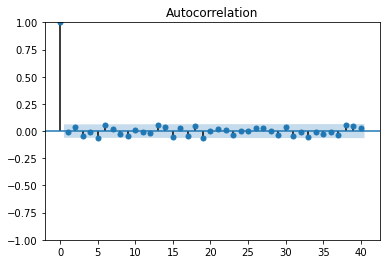

In [27]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

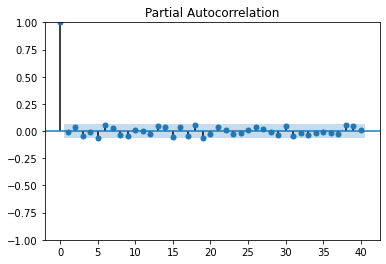

In [38]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

The results show no signs of autocorelation since there are no spikes outside the confidence interval region.

# Conclusion

Most the assumption of linear regression holds good in this case hence we can continue using linear model.

# Using OLS model

In [55]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

#display adjusted R-squared
print(model.rsquared_adj)

0.7327204026971836


In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          3.17e-276
Time:                        15:17:26   Log-Likelihood:                -10172.
No. Observations:                1003   AIC:                         2.037e+04
Df Residuals:                     990   BIC:                         2.043e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.328e+04    195.592     67.882      0.000    1.29e+04    1.37e+04
x1          3506.2858    198.010     17.708      0.000    3117.718    3894.853
x2          2013.2106    202.530      9.940      0.000    1615.773    2410.648
x3            12.9377    196.011      0.066      0.947    -371.708     397.583
x4           157.9414    213.102      0.741      0.459    -260.242     576.125
x5           673.5914    211.445      3.186      0.001     258.660    1088.522
x6           233.8140    210.508      1.111      0.267    -179.278     646.906
x7           477.5338    207.388      2.303      0.022      70.563     884.504
x8            60.1146    187.904      0.320      0.749    -308.621     428.850
x9          9542.1107    198.819     47.994      0.000    9151.955    9932.267
x10          -89.8496    246.066     -0.365      0.715    -572.720     393.021
x11         -486.0097    255.658     -1.901      0.058    -987.705      15.685
x12         -375.9858    241.732     -1.555      0.120    -850.351      98.379
==============================================================================
Omnibus:                      242.198   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.318
Skew:                           1.275   Prob(JB):                    8.82e-130
Kurtosis:                       5.778   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 0.9994547916438284
R squared: 0.9994547916438284


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9732815469999192
R squared: 0.9732815469999192


In [64]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [3505.15264762 2012.53020161   13.1366186   157.75508628  673.52206503
  233.95358058  477.26871363   59.91176056 9539.07585503  -89.72748
 -485.30688005 -375.80319888]


In [65]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7359212829244568
0.7939935144702063


In [69]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [3506.21862975 2013.07366663   12.8555778   157.72191441  673.39366871
  233.63951825  477.38164312   59.97974603 9542.01131992  -89.52844158
 -485.62574863 -375.65112809]


In [70]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7359213543369822
0.7940100342653436


In [77]:
Elastic_Net = ElasticNet(alpha = 1)
Elastic_Net.fit(X_train, y_train)
print('Elastic_Net:', (Elastic_Net.coef_))

Elastic_Net: [ 2.27546764e+03  1.32623391e+03  1.57155228e+02 -2.71765854e+00
  5.46844580e+02  3.04262530e+02  2.27463007e+02 -1.00351202e+02
  6.24856140e+03 -6.81170514e+01  1.66798114e+01 -2.87967035e+02]


In [78]:
print(Elastic_Net.score(X_train, y_train))
print(Elastic_Net.score(X_test, y_test))

0.6506114694605963
0.6864754662266479


In [81]:
from sklearn.model_selection import KFold, cross_val_score

In [87]:
kfold_validation=KFold(5)
scores = cross_val_score(regr, X_train, y_train, scoring='r2', cv=kfold_validation)
scores 

array([0.77622098, 0.67418187, 0.7211705 , 0.70378503, 0.72419684])

In [88]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.77622098 0.67418187 0.7211705  0.70378503 0.72419684]
Average CV Score:  0.7199110433048544
Number of CV Scores used in Average:  5
